In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Connect Four Game Implementation

Connect Four (also known as Connect 4, Four Up, Plot Four, Find Four, Captain's Mistress, Four in a Row, Drop Four, and Gravities in the Soviet Union) is a two-player connection board game, in which the players choose a color and then take turns dropping colored tokens into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal or vertical line of four of one's own tokens. For this lab, the winner will be only the first one who forms a horizontal or vertical line. The diagonal will be a stretch goal.

We will build a Connect Four game with the help of the `numpy` and `matplotlib` libraries. Player one will be represented as number 1, and player two as number 2.

## Class Definition

We will create a class called `ConnectFour` with the following methods:

### Constructor

Attributes:
- `board`: A 6x7 array of zeros representing the game board.
- `winner`: An attribute to keep track of the winner (0 if no winner).

### Methods

#### `drop_piece`

Parameters:
- `player_number`: The player number (1 or 2).
- `column`: The column where the player will put the token.

Functionality:
- Find the first available place in the column to put the token.
- Return the row and a boolean indicating if there is a place available.

#### `check_winner`

Parameters:
- `row`: The row of the last placed token.
- `column`: The column of the last placed token.

Functionality:
- Check if there is a winner by forming a horizontal or vertical line.
- Return a boolean indicating if there is a winner.

#### `show_board`

Functionality:
- Display the board using `imshow()` from `pyplot`.
- Ensure each player's token has a different color.

#### `play`

Parameters:
- `player_number`: The player number (1 or 2).
- `column`: The column where the player will drop the token.

Functionality:
- Check if the player number is valid (1 or 2).
- Drop a piece.
- Check if there is a winner.
- Display the board.

In [27]:
import matplotlib.pyplot as plt

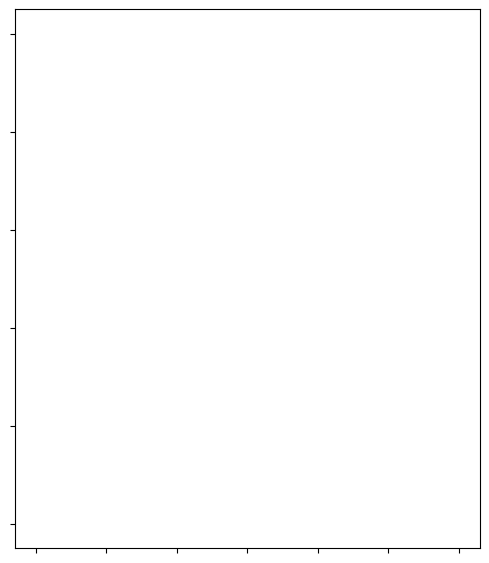

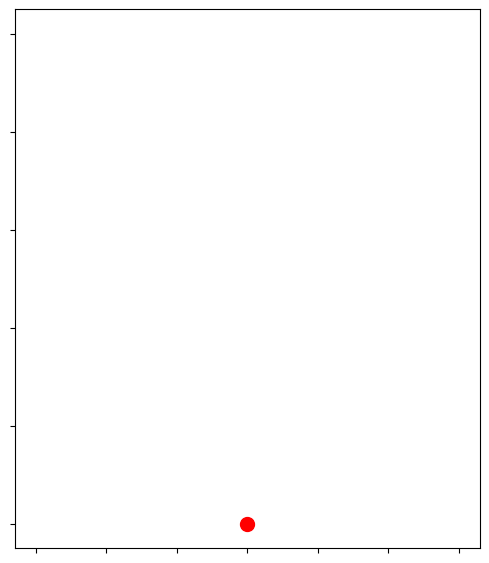

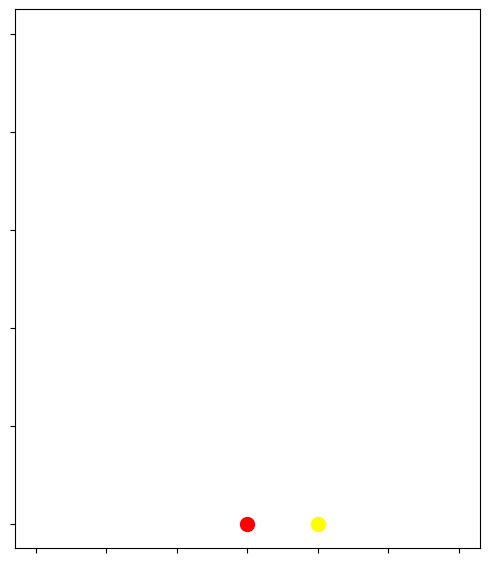

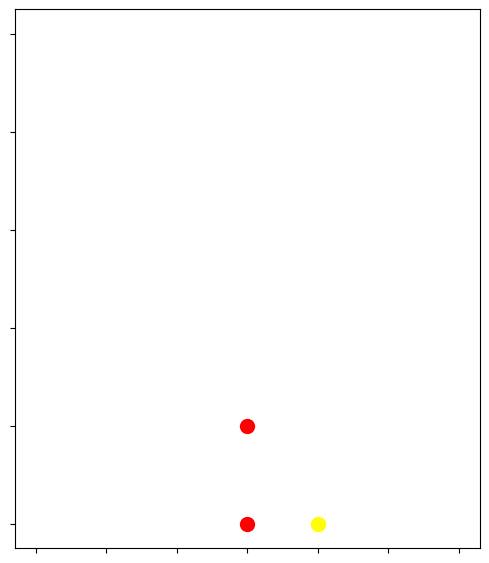

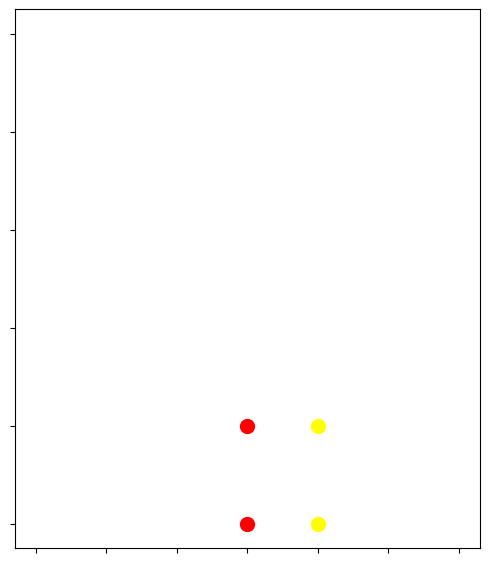

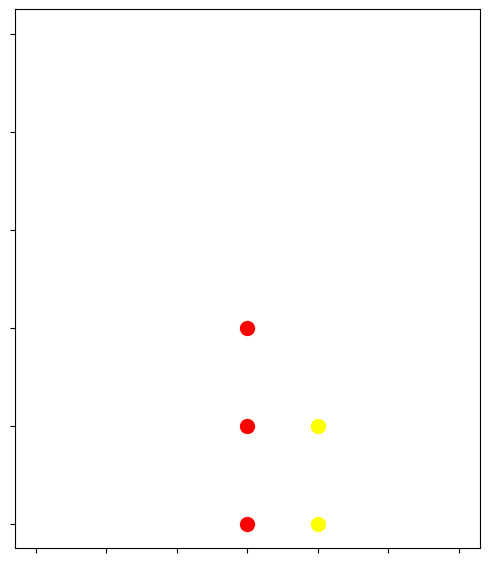

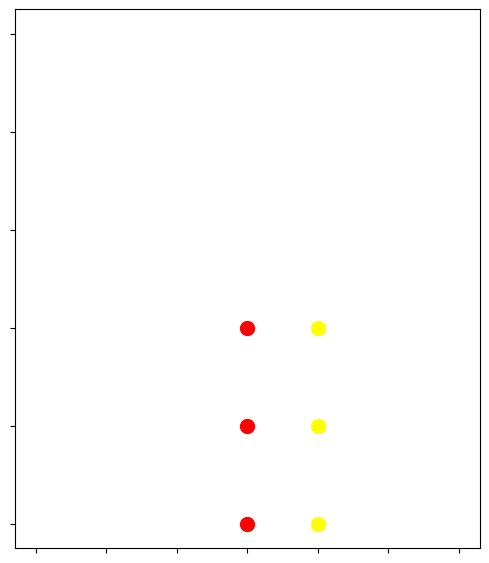

Player 1 wins with a verticalline!


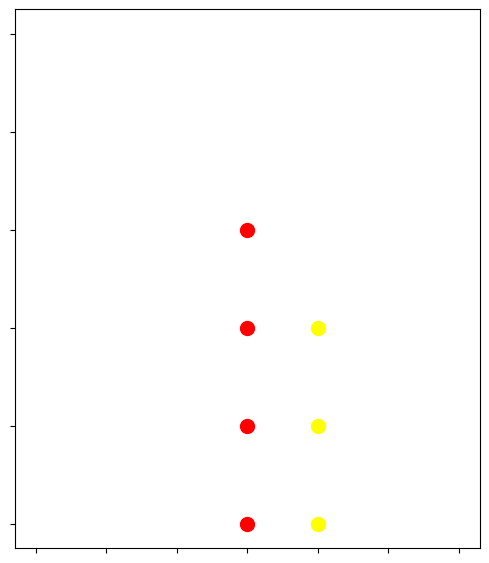

Player 1 wins with a verticalline!


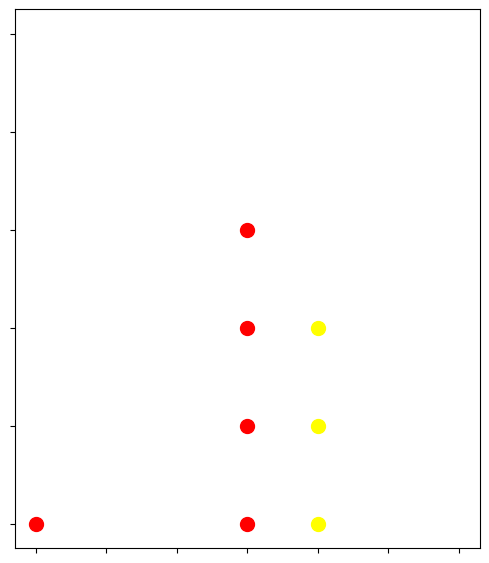

Player 1 wins with a verticalline!


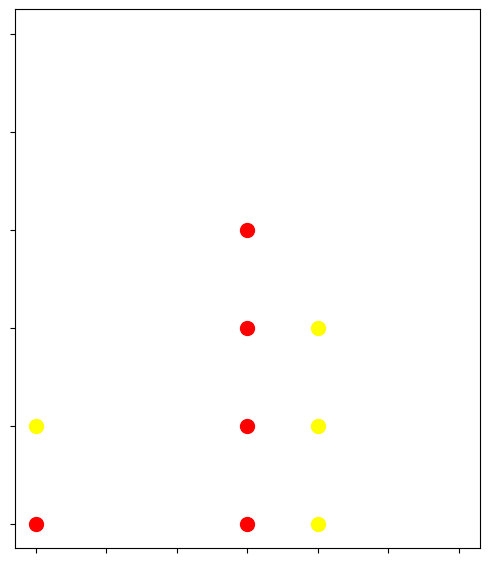

Player 1 wins with a verticalline!


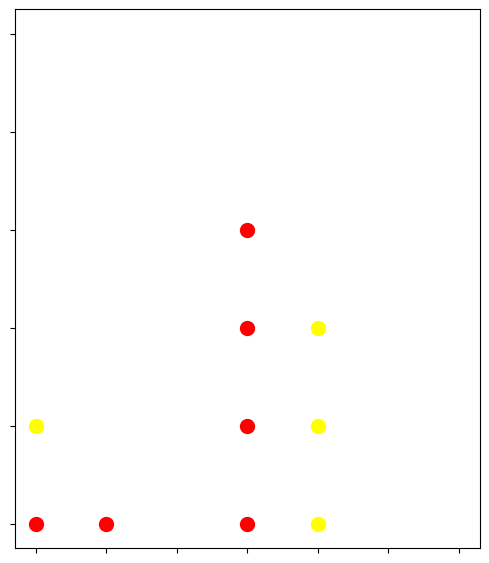

Player 1 wins with a verticalline!


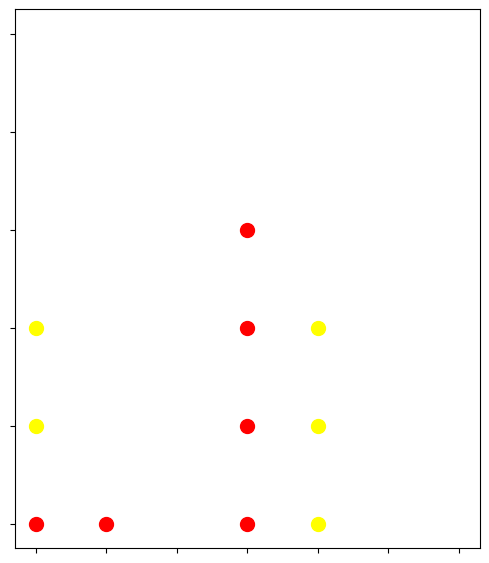

Player 1 wins with a verticalline!


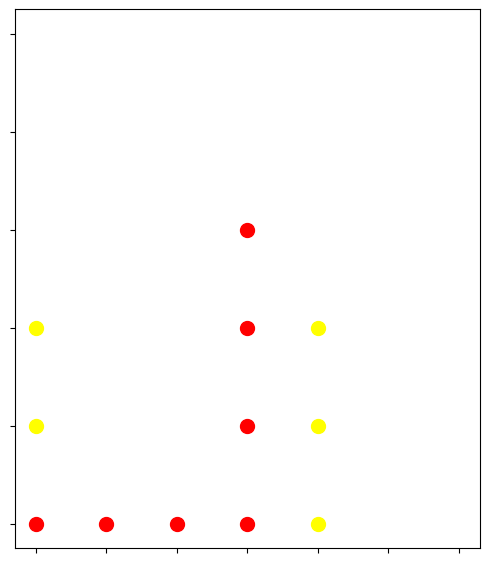

Player 1 wins with a verticalline!


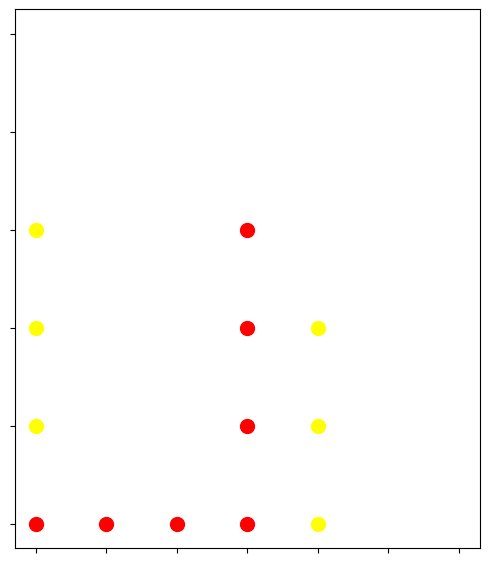

Player 1 wins with a verticalline!


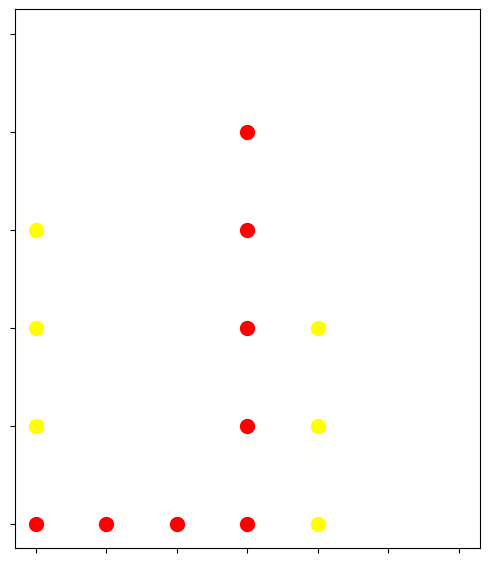

Player 2 wins with a verticalline!


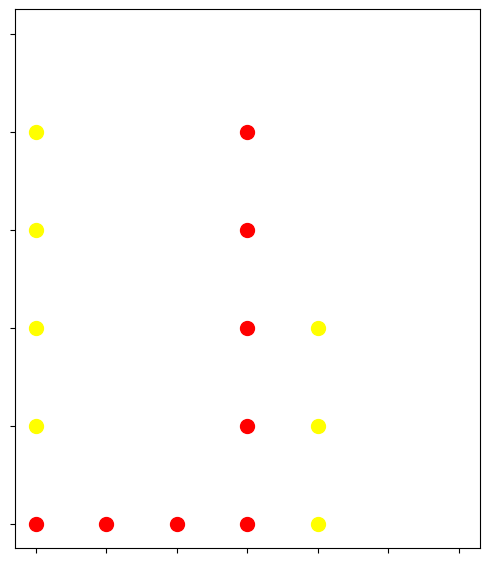

Player 2 wins with a verticalline!


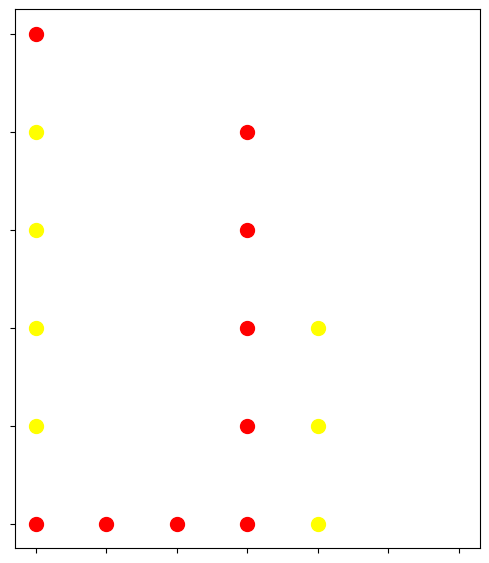

Player 2 wins with a verticalline!


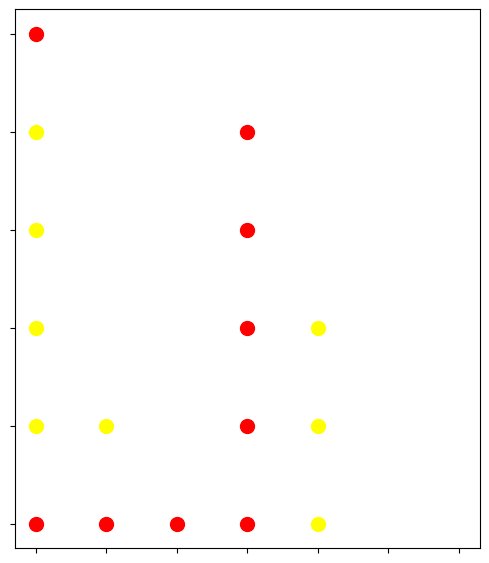

Player 2 wins with a verticalline!


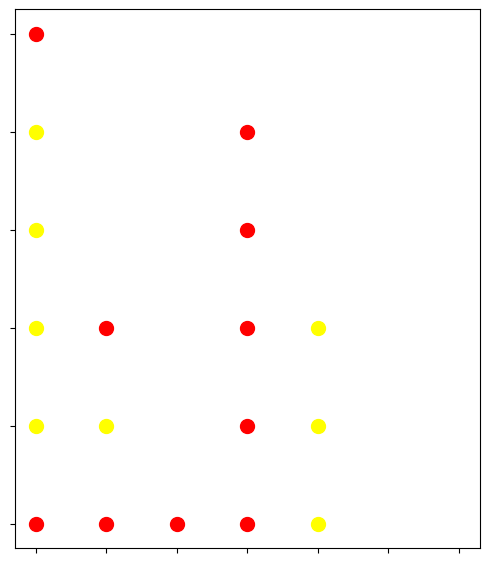

Player 2 wins with a verticalline!


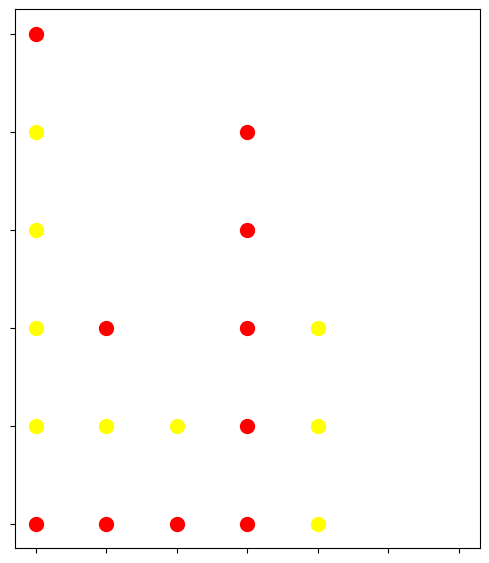

Player 2 wins with a verticalline!


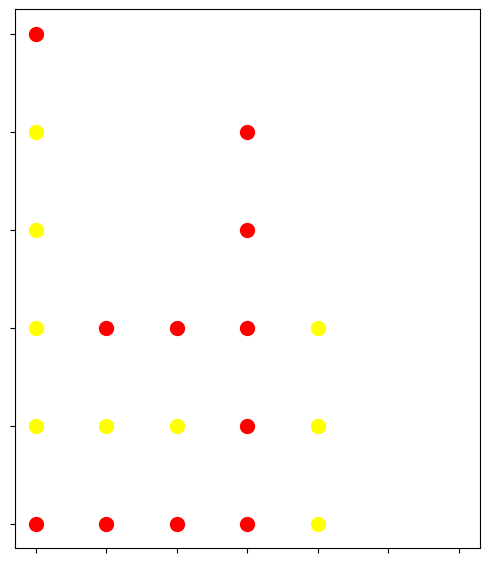

Player 2 wins with a verticalline!


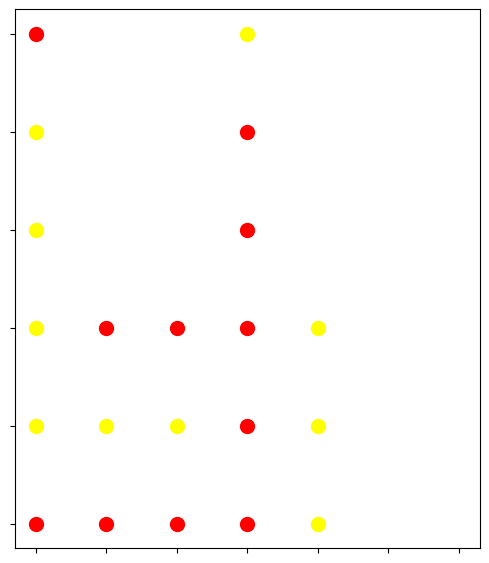

Player 2 wins with a verticalline!


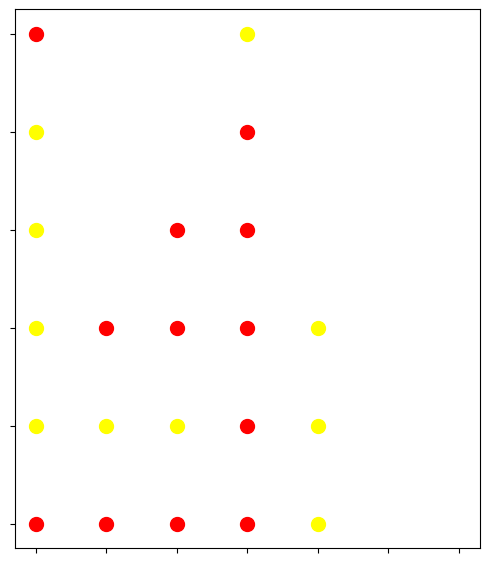

Column is full. Please choose another column.
Column is full. Please choose another column.
Player 2 wins with a verticalline!


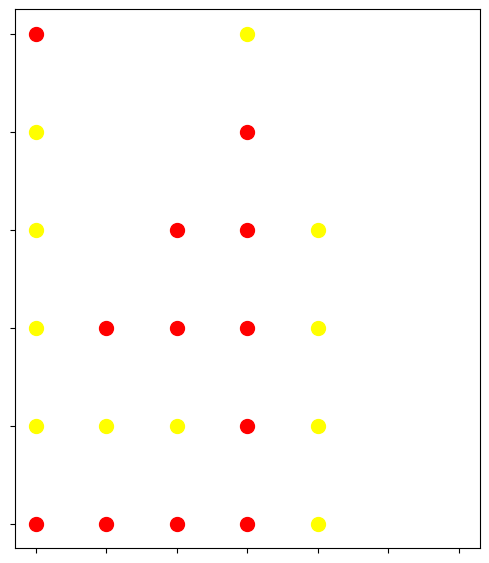

Column is full. Please choose another column.
Player 2 wins with a verticalline!


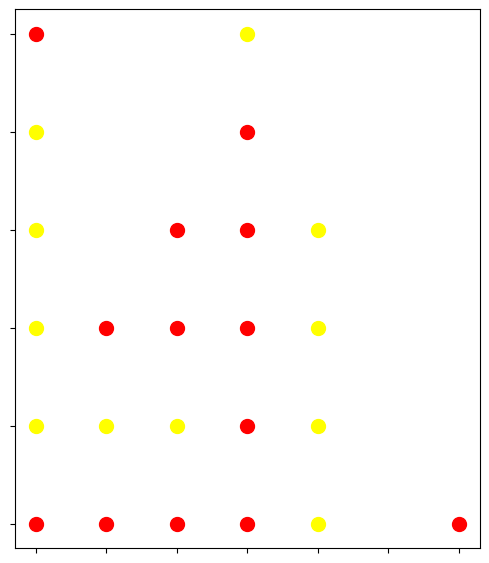

Player 2 wins with a verticalline!


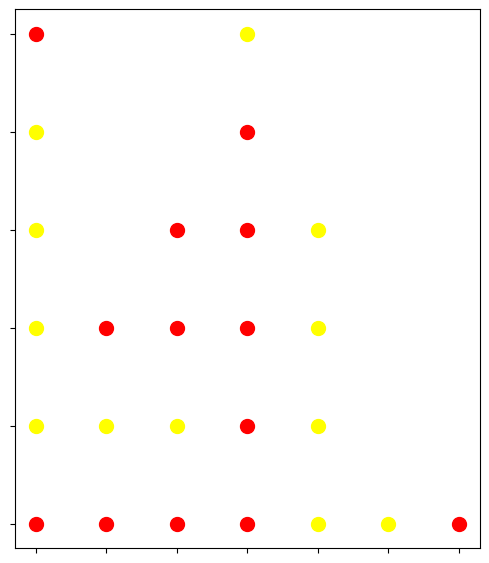

Player 2 wins with a verticalline!


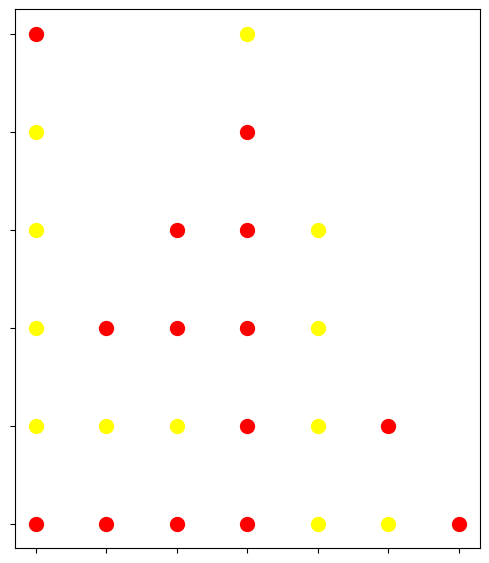

Player 2 wins with a verticalline!


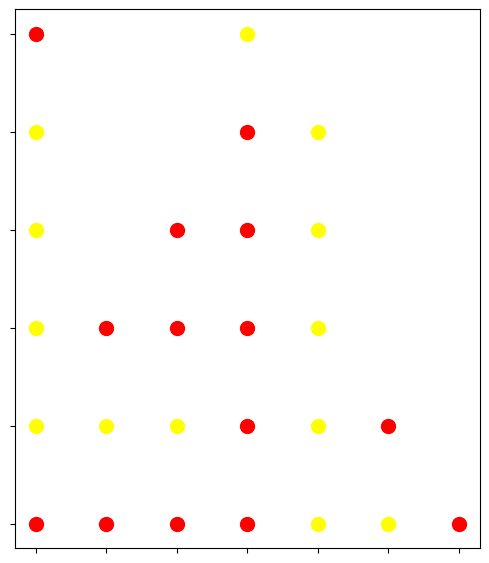

Player 1 wins with a diagonal (/)line!


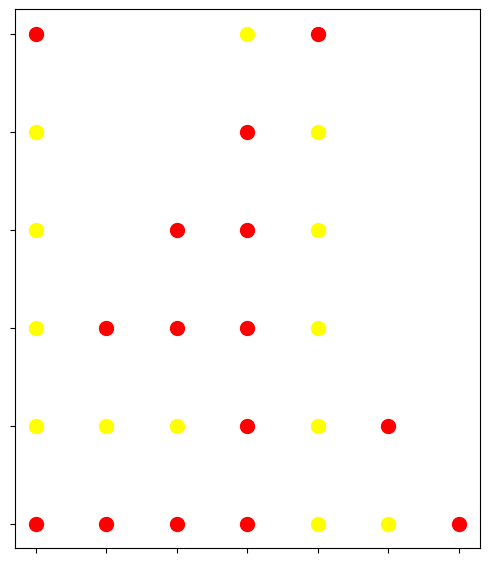

Column is full. Please choose another column.
Column is full. Please choose another column.
Column is full. Please choose another column.
Column is full. Please choose another column.


In [28]:
class ConnectFour:
    def __init__(self):
        self.board = np.zeros((6, 7))
        self.winner = 0 
        self.colors = {1: 'red', 2: 'yellow'}
        self.max_moves = 42 
        self.winner_row = 0 
        self.winner_column = 0
        
    def drop_piece(self, player_number, column):
        if(self.board[:, column] != 0).all() or column > 6 or column < 0:
            return -1, False
        else:
            for i in range(5, -1, -1):
                if self.board[i, column] == 0:
                    self.board[i, column] = player_number
                    return i, True
                
    def check_winner(self, row, column):
        player = self.board[row, column] 
        if column <= 3 and (self.board[row, column: column+4] == player).all():
            self.winner_row = row
            self.winner_column = column 
            return True, "horizontal"
        if row <= 2 and (self.board[row:row+4, column] == player).all():
            self.winner_row = row
            self.winner_column = column
            return True, "vertical"
        if row <= 2 and column <= 3 and (self.board[row:row+4, column:column+4].diagonal() == player).all():
            self.winner_row = row
            self.winner_column = column
            return True, "diagonal (\\)"
        if row <= 2 and column >= 3 and (np.fliplr(self.board[row:row+4, column-3:column+1]).diagonal() == player).all():
            self.winner_row = row
            self.winner_column = column
            return True, "diagonal (/)"
        return False, None
    
    def show_board(self):
        plt.figure(figsize= (6, 7))
        for i in range(6):
            for j in range(7):
                if self.board[i, j] == 0:
                    color = 'white'
                else:
                    color = self.colors[self.board[i, j]]
                plt.scatter(j, i, color= color, s= 100)
        plt.gca().invert_yaxis()
        plt.xticks(range(7), [])
        plt.yticks(range(6), [])
        
        if self.winner != 0:
            print(f"Player {self.winner} wins with a {self.check_winner(self.winner_row, self.winner_column)[1]}line!")
        plt.show()
        
    def play(self, player_number, column):
        if player_number not in [1, 2]:
             raise ValueError("Player number must be 1 or 2")
        row, success = self.drop_piece(player_number, column)
        if success:
            if self.check_winner(row, column)[0]:
                self.winner = player_number
                self.show_board()
                return player_number
            elif np.count_nonzero(self.board) == self.max_moves:
                print("It's a tie!")
                self.show_board()
                return -1
            else:
                self.show_board()
                return None
        else:
            print("Column is full. Please choose another column.")
            return None

def test_game():
    game = ConnectFour()
    game.show_board()
    
    # Scenario 1: Player 1 wins with vertical lines
    game.play(1, 3)
    game.play(2, 4)
    game.play(1, 3)
    game.play(2, 4)
    game.play(1, 3)
    game.play(2, 4)
    game.play(1, 3)
    
    # Scenario 2: Player 2 wins with horizontal lines 
    game.play(1, 0)
    game.play(2, 0)
    game.play(1, 1)
    game.play(2, 0)
    game.play(1, 2)
    game.play(2, 0)
    game.play(1, 3)
    game.play(2, 0)
    
    # Scenario 3: Player 1 wins with diaginal lines (from bottom-left to top-right)
    game.play(1, 0)
    game.play(2, 1)
    game.play(1, 1)
    game.play(2, 2)
    game.play(1, 2)
    game.play(2, 3)
    game.play(1, 2)
    game.play(2, 3)
    game.play(1, 3)
    game.play(2, 4)
    game.play(1, 3)
    
    # Scenario 4 Player 2 wins with diaginal lines (from bottom-right to top-left)
    moves = [(1, 6), (2, 5), (1, 5), (2, 4), (1, 4), (2, 3), (1, 4), (2, 3), (1, 3)]
    for move in moves:
        game.play(*move)
    
test_game()